# Load the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv(r'C:\Users\User\Downloads\uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# Explore the data set

In [4]:
df.shape

(200000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df[df.duplicated()].sum()

Unnamed: 0             0
key                    0
fare_amount          0.0
pickup_datetime        0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count        0
dtype: object

# Checking for missing values

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

### For 'pickup_longitude','dropoff_longitude','pickup_latitude','dropoff_latitude'

In [9]:
invalid_piclon=df[(df['pickup_longitude']<-180)|(df['pickup_longitude']>180)]
invalid_droplon=df[(df['dropoff_longitude']<-180)|(df['dropoff_longitude']>180)]  
invalid_piclat=df[(df['pickup_latitude']<-90)|(df['pickup_latitude']>90)]
invalid_droplat=df[(df['dropoff_latitude']<-90)|(df['dropoff_latitude']<90)]

### Impute invalid data with 'nan'

In [10]:
df['pickup_longitude']=np.where((df['pickup_longitude']<-180)|(df['pickup_longitude']>180),np.nan,df['pickup_longitude'])

In [11]:
df['dropoff_longitude']=np.where((df['dropoff_longitude']<-180)|(df['dropoff_longitude']>180),np.nan,df['dropoff_longitude'])
df['pickup_latitude']=np.where((df['pickup_latitude']<-90)|(df['pickup_latitude']>90),np.nan,df['pickup_latitude'])
df['dropoff_latitude']=np.where((df['dropoff_latitude']<-90)|(df['dropoff_latitude']>90),np.nan,df['dropoff_latitude'])

In [12]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     7
pickup_latitude      4
dropoff_longitude    4
dropoff_latitude     4
passenger_count      0
dtype: int64

### Impute missing values with median

In [13]:
df['pickup_longitude']=df['pickup_longitude'].fillna(df['pickup_longitude'].median())

In [14]:
df['pickup_latitude']=df['pickup_latitude'].fillna(df['pickup_latitude'].median())
df['dropoff_longitude']=df['dropoff_longitude'].fillna(df['dropoff_longitude'].median())
df['dropoff_latitude']=df['dropoff_latitude'].fillna(df['dropoff_latitude'].median())

### Find the Distance

In [15]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [16]:
from geopy.distance import great_circle

In [17]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    
 
    start_coordinates=(pickup_lat,pickup_long)
    stop_coordinates=(dropoff_lat,dropoff_long)
    
 
    return great_circle(start_coordinates,stop_coordinates).km

In [18]:
df['distance']=df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [19]:
df['distance']=round(df['distance'],0)

<Axes: >

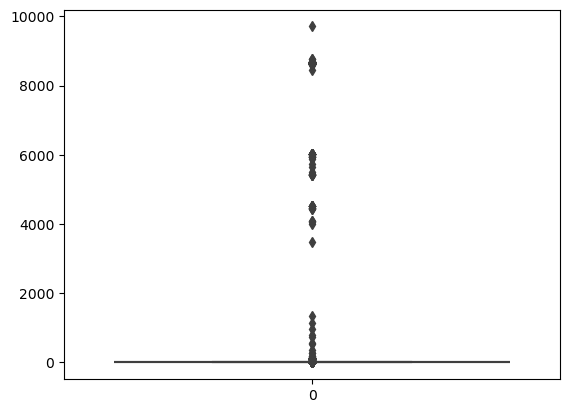

In [20]:
df['distance']
sns.boxplot(df['distance'])

## Handling the outliers

In [21]:
df['distance'].describe()

count    200000.000000
mean         20.610985
std         380.225836
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        9710.000000
Name: distance, dtype: float64

In [22]:
q1=df['distance'].quantile(0.25)
q3=df['distance'].quantile(0.90)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df.loc[df['distance']>=ub,'distance']=ub
df.loc[df['distance']<=lb,'distance']=lb

In [23]:
df['distance'].describe()

count    200000.000000
mean          3.201700
std           3.245924
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          16.000000
Name: distance, dtype: float64

<Axes: >

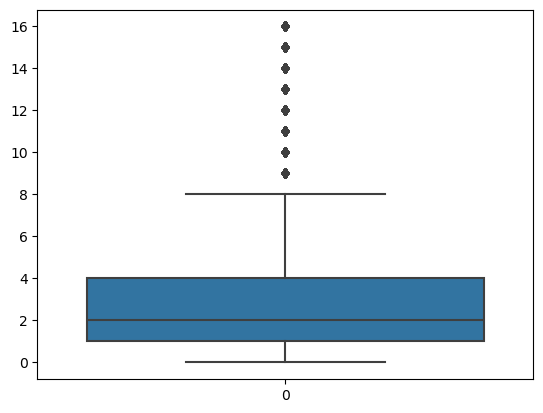

In [24]:
sns.boxplot(df['distance'])

## Outliers checking for target variable

In [25]:
df['fare_amount'].describe()

count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

## Target feature has a lot of outliers

In [26]:
q1=df['fare_amount'].quantile(0.30)

In [27]:
q3=df['fare_amount'].quantile(0.75)

In [28]:
iqr=q3-q1

In [29]:
lb=q1-1.5*iqr
ub=q3+1.5*iqr

In [30]:
df.loc[df['fare_amount']>=ub,'fare_amount']=ub
df.loc[df['fare_amount']<=lb,'fare_amount']=lb

<Axes: xlabel='fare_amount'>

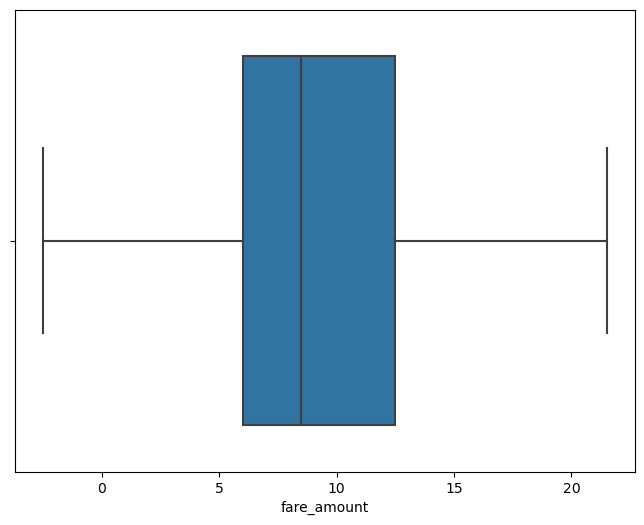

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='fare_amount',data=df)

<Axes: xlabel='fare_amount', ylabel='Count'>

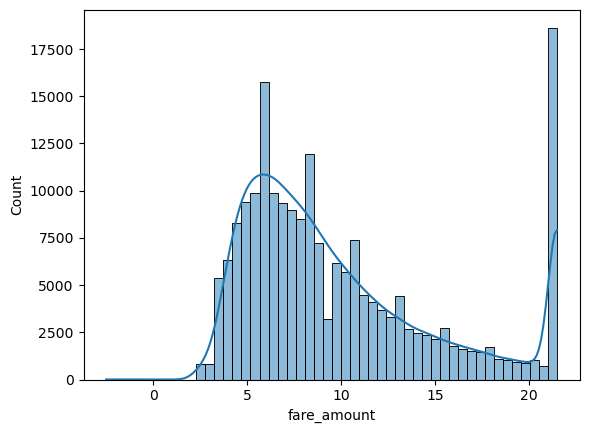

In [32]:
sns.histplot(df['fare_amount'],bins=50,kde=True)

<Axes: xlabel='fare_amount', ylabel='Count'>

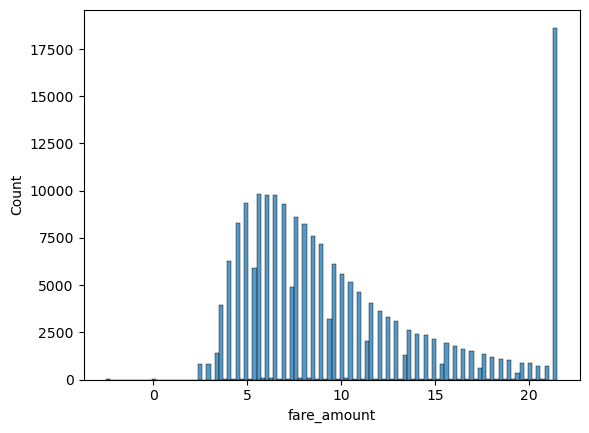

In [33]:
sns.histplot(df['fare_amount'])

# Feature Engineering

In [34]:
df['date']=df['pickup_datetime'].apply(lambda x:x.split(' ')[0])

In [35]:
df['pickup_time']=df['pickup_datetime'].apply(lambda x:x.split(' ')[1])

In [36]:
df['date']=pd.to_datetime(df['date'],format='%Y-%M-%d')

In [37]:
df['year']=df['date'].dt.year

In [38]:
df['hour']=df['pickup_time'].apply(lambda x:x.split(':')[0])

In [39]:
df['hour']=df['hour'].astype(int)

In [40]:
df=df.drop(['date','pickup_time'],axis=1)

In [41]:
df=df.drop(['key','Unnamed: 0','pickup_datetime'],axis=1)

In [42]:
b = [-1,12,16,24]
l = ['Morning','afterNoon','Eve']
df['session'] = pd.cut(df['hour'], bins=b, labels=l)

In [43]:
df['session']

0               Eve
1               Eve
2               Eve
3           Morning
4               Eve
            ...    
199995      Morning
199996      Morning
199997      Morning
199998    afterNoon
199999      Morning
Name: session, Length: 200000, dtype: category
Categories (3, object): ['Morning' < 'afterNoon' < 'Eve']

In [44]:
bins=[-1,3,8,17]
labels=['short','medium','long']
df['distance_category']=pd.cut(df['distance'],bins=bins,labels=labels)

In [45]:
df['distance_category']

0          short
1          short
2         medium
3          short
4         medium
           ...  
199995     short
199996     short
199997      long
199998    medium
199999    medium
Name: distance_category, Length: 200000, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [46]:
df['distance_category'].isnull().sum()

0

In [47]:
df=df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance'],axis=1)

In [48]:
df=df.drop(['hour','year'],axis=1)

In [49]:
df.head(20)

,fare_amount,passenger_count,session,distance_category
0,7.5,1,Eve,short
1,7.7,1,Eve,short
2,12.9,1,Eve,medium
3,5.3,3,Morning,short
4,16.0,5,Eve,medium
5,4.9,1,Morning,short
6,21.5,5,Morning,long
7,2.5,1,afterNoon,short
8,9.7,1,Morning,short
9,12.5,1,Eve,medium


## Visualization

### Univariate Analyses

<Axes: xlabel='session', ylabel='count'>

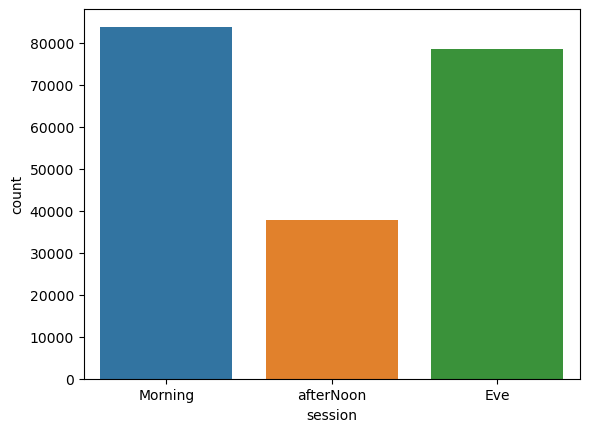

In [50]:
sns.countplot(x='session',data=df)

<Axes: xlabel='distance_category', ylabel='count'>

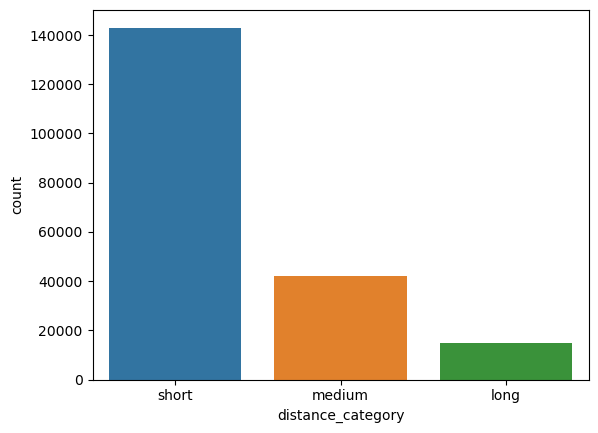

In [51]:
sns.countplot(x='distance_category',data=df)

### Bivariate Analysis

<Axes: xlabel='session'>

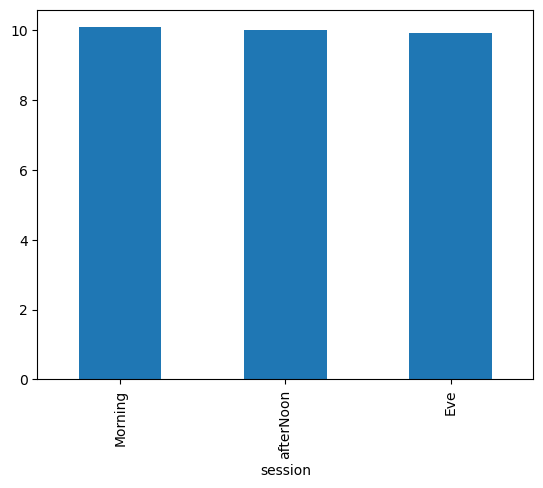

In [52]:
df.groupby("session")['fare_amount'].mean().plot.bar()

<Axes: xlabel='distance_category'>

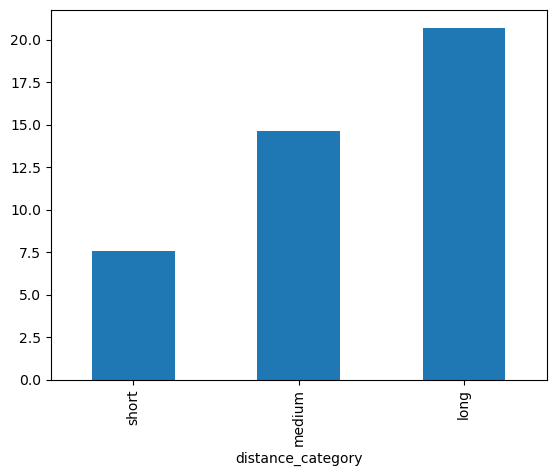

In [53]:
df.groupby("distance_category")['fare_amount'].mean().plot.bar()

<Axes: xlabel='passenger_count'>

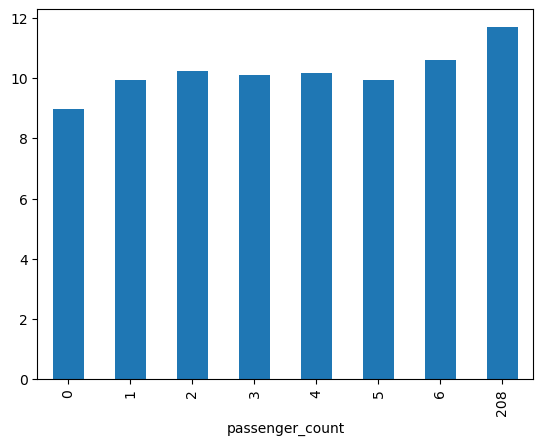

In [54]:
df.groupby("passenger_count")['fare_amount'].mean().plot.bar()

<Axes: xlabel='distance_category', ylabel='fare_amount'>

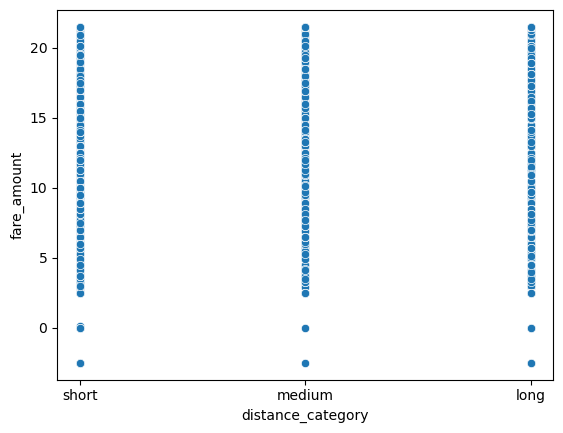

In [55]:
sns.scatterplot(y='fare_amount',x='distance_category',data=df)

<Axes: xlabel='session', ylabel='fare_amount'>

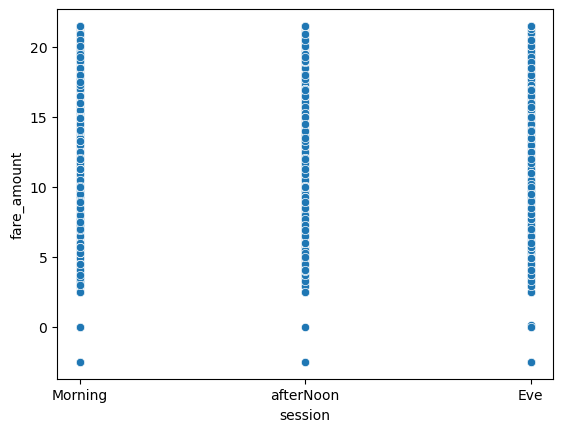

In [56]:
sns.scatterplot(y='fare_amount',x='session',data=df)

<Axes: xlabel='session', ylabel='fare_amount'>

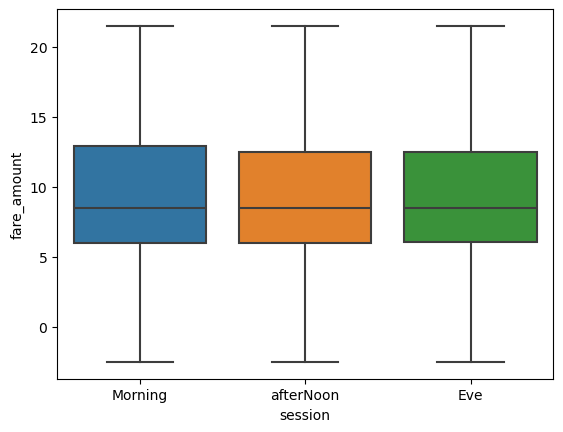

In [57]:
sns.boxplot(x = 'session', y = 'fare_amount', data = df)

### Create dummies for categorical variable

In [58]:
session_dummy = pd.get_dummies(df['session'],drop_first=True, dtype = 'int')

In [59]:
session_dummy

,afterNoon,Eve
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1
...,...,...
199995,0,0
199996,0,0
199997,0,0
199998,1,0


In [60]:
df=pd.concat([df,session_dummy],axis=1)

In [61]:
df=df.drop('session',axis=1)

In [62]:
distance_dummy=pd.get_dummies(df['distance_category'],drop_first=True, dtype = 'int')
df=pd.concat([df,distance_dummy],axis=1)

In [63]:
df=df.drop('distance_category',axis=1)

In [64]:
df

,fare_amount,passenger_count,afterNoon,Eve,medium,long
0,7.5,1,0,1,0,0
1,7.7,1,0,1,0,0
2,12.9,1,0,1,1,0
3,5.3,3,0,0,0,0
4,16.0,5,0,1,1,0
...,...,...,...,...,...,...
199995,3.0,1,0,0,0,0
199996,7.5,1,0,0,0,0
199997,21.5,2,0,0,0,1
199998,14.5,1,1,0,1,0


In [65]:
df.corr()

,fare_amount,passenger_count,afterNoon,Eve,medium,long
fare_amount,1.000000,0.013734,0.000369,-0.011899,0.451646,0.571166
passenger_count,0.013734,1.000000,0.000378,0.019067,0.004637,0.004785
afterNoon,0.000369,0.000378,1.000000,-0.387252,-0.051268,0.012968
Eve,-0.011899,0.019067,-0.387252,1.000000,0.022876,-0.023828
medium,0.451646,0.004637,-0.051268,0.022876,1.000000,-0.146091
long,0.571166,0.004785,0.012968,-0.023828,-0.146091,1.000000


<Axes: >

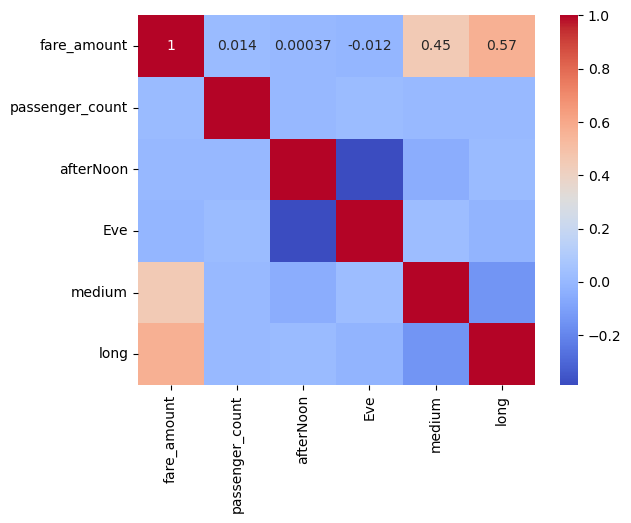

In [66]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

## Train test Split

In [67]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3,train_size=0.7,random_state=100)

In [68]:
df_train.shape

(140000, 6)

In [69]:
df_test.shape

(60000, 6)

### Standardization

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [71]:
col=['fare_amount','passenger_count']
df_train[col]=scaler.fit_transform(df_train[col])
df_test[col]=scaler.transform(df_test[col])

<Axes: >

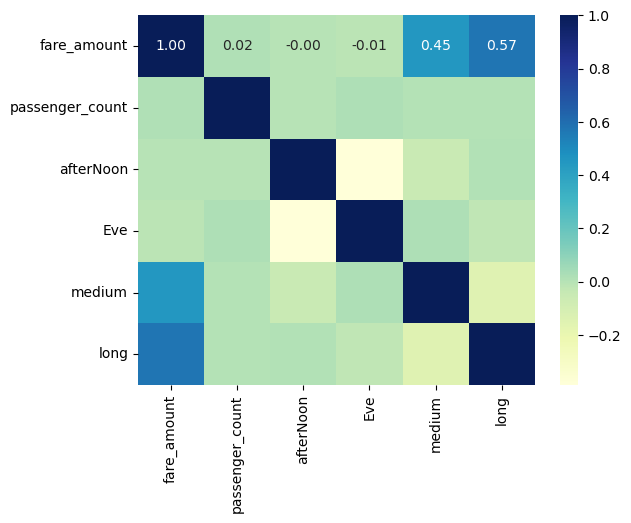

In [72]:
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",fmt=".2f")

# Correlation Analysis

### Correlation Analysis

In [73]:
y_train = df_train.pop('fare_amount')
X_train = df_train

In [74]:
X_train

,passenger_count,afterNoon,Eve,medium,long
195896,0.931428,0,0,0,0
47114,0.224937,1,0,1,0
144875,-0.481554,0,0,0,0
184791,0.224937,0,1,0,0
123269,0.224937,0,0,0,0
...,...,...,...,...,...
194442,-0.481554,0,1,0,0
65615,0.224937,0,1,0,0
77655,-0.481554,0,0,0,0
56088,-0.481554,0,1,0,0


In [75]:
y_train

195896   -0.379462
47114     0.621619
144875   -1.040553
184791   -1.134994
123269   -0.568345
            ...   
194442    0.092746
65615    -0.360573
77655     0.848279
56088     0.546066
38408     0.168299
Name: fare_amount, Length: 140000, dtype: float64